In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import urllib.parse
import matplotlib.pyplot as plt

In [4]:
def loadFile(name):
    directory = str(os.getcwd())
    filepath = os.path.join(directory, name)
    with open(filepath,'r') as f:
        data = f.readlines()
    data = list(set(data))
    result = []
    for d in data:
        d = str(urllib.parse.unquote(d))   #converting url encoded data to simple string
        result.append(d)
    return result

In [5]:
badQueries = loadFile('/Users/tejaswinisudhakar/Downloads/badqueries.txt')
validQueries = loadFile('/Users/tejaswinisudhakar/Downloads/goodqueries.txt')

In [6]:
badQueries = list(set(badQueries))
validQueries = list(set(validQueries))
allQueries = badQueries + validQueries
yBad = [1 for i in range(0, len(badQueries))]  #labels, 1 for malicious and 0 for clean
yGood = [0 for i in range(0, len(validQueries))]
y = yBad + yGood
queries = allQueries
print("BAD QUERIES")    #Processed dataset for bad queries
for i in range(1,10):
    print(allQueries[i],":",y[i])
print("VALID QUERIES")             #Processed dataset for good queries
for i in range(1265974,1265984):
    print(allQueries[i],":",y[i])

BAD QUERIES
/..\..\\..\..\\..\..\\..\..\\\{FILE}
 : 1
/cleartrust/ct_logon.jsp?ctloginerrormsg=<script>alert(1)</script>
 : 1
/index.php?RP_PATH=XXpathXX
 : 1
/recordings/gotopage.cgi?4242+../../../../../../../../../../../../../etc/passwd
 : 1
|echo YSISTZ$((83+82))$(echo YSISTZ)YSISTZ//
 : 1
/main.php?logout=;uname\x09>q84429989\x09#
 : 1
/scripts/axdgpyi2bn6f.cgi
 : 1
/..%5c..%5c..%5c..%5c..%5c..%5c..%5c..%5c{FILE}
 : 1
/examples/jsp/jsp2/jspx/search.cgi?..\..\..\..\..\..\winnt\win.ini
 : 1
VALID QUERIES
/navbanner_05/
 : 0
/javascript/xls.php
 : 0
/freecheck_263x220/
 : 0
/javascript/codecs.fcgi
 : 0
/x_windows/
 : 0
/122471/
 : 0
/lanmessage/
 : 0
/itordboken/
 : 0
/1903663/
 : 0
/58272265/
 : 0


In [7]:
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3)) #converting data to vectors
X = vectorizer.fit_transform(queries)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting data
badCount = len(badQueries)
validCount = len(validQueries)

In [8]:
lgs = LogisticRegression(solver='liblinear') # (class_weight='balanced')
lgs.fit(X_train, y_train) #training our model

LogisticRegression(solver='liblinear')

In [9]:
##############
# Evaluation #
##############

predicted = lgs.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, (lgs.predict_proba(X_test)[:, 1])) #performance matrix to measure classification model tpr should be high, fpr should be low. So that the model is not unfit or overfit
auc = metrics.auc(fpr, tpr) 
print("TEST DATA")
for i in range(1020,1050):   #Testing data
    if(y_test[i] == 1):
        print(allQueries[i],": INTRUSION DETECTED") 
    else:
        print(allQueries[i],": NO INTRUSION DETECTED")
print("Bad samples: %d" % badCount)
print("Good samples: %d" % validCount)
print("Baseline Constant negative: %.6f" % (validCount / (validCount + badCount)))
print("------------")
print("Accuracy: %f" % lgs.score(X_test, y_test))  #checking the accuracy
print("Precision: %f" % metrics.precision_score(y_test, predicted)) #Precision is all the points that are declared to be positive but what percentage of them are actually positive.

print("Recall: %f" % metrics.recall_score(y_test, predicted)) #Recall is all the points that are actually positive but what percentage declared positive
print("F1-Score: %f" % metrics.f1_score(y_test, predicted)) #F1-Score is used to measure test accuracy. It is a weighted average of the precision and recall. When F1 score is 1 it’s best and on 0 it’s worst.
print("AUC: %f" % auc) #Accuracy

TEST DATA
%u0022%u003e%u003cscript%u003ealert%u0028%u0027XSS%u0027%u0029%u003b%u003c%uff0fscript%u003e
 : NO INTRUSION DETECTED
/javascript/webcasts.exe
 : NO INTRUSION DETECTED
/r3le3om5.php3?<script>cross_site_scripting.nasl</script>
 : NO INTRUSION DETECTED
/cgi-915/testcgi.exe
 : NO INTRUSION DETECTED
/eg2u8pbv.fts?<script>cross_site_scripting.nasl</script>
 : NO INTRUSION DETECTED
/javascript/.htpasswd.sfish/http://skipfish.invalid/;?
 : NO INTRUSION DETECTED
/scripts/faq.php?action=&type=view&s=&id=-1' union select 0,1340614335,0,0,0,0,0--
 : NO INTRUSION DETECTED

 str=$(echo YCSCIW)
 str1=${#str}
 if [ 6 -ne ${str1} ]
 then sleep 0
 else sleep 1
 fi //
 : NO INTRUSION DETECTED
/%c0%ae%c0%ae/%c0%ae%c0%ae/%c0%ae%c0%ae/%c0%ae%c0%ae/%c0%ae%c0%ae/{FILE}
 : NO INTRUSION DETECTED
/awstats/awstats.pl?migrate=|echo;/bin/echo -en "h\0300\0250\0312fh\0002\0000\0344\0335\0211\0340j\0020pr" >> /tmp/urcppbumwm0;echo|awstats490058.txt
 : NO INTRUSION DETECTED
/script/gestion/index.php?path_in

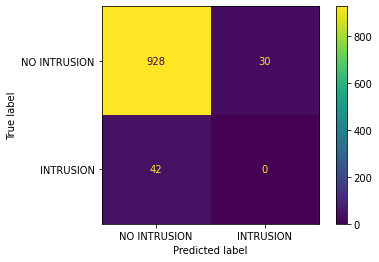

In [10]:
import random
actual = random.sample(y,1000)
predicted = random.sample(y_test,1000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["NO INTRUSION", "INTRUSION"])
cm_display.plot()
plt.show()

In [11]:
import smtplib
from email.message import EmailMessage
def email_alert(subject,body,to):
    msg = EmailMessage()
    msg.set_content(body)
    msg['subject'] = subject
    msg['to'] = to
    user = "email.alert.secure@gmail.com"
    msg['from'] = user
    password = "ydoavmtsyyktmxzd"
    
    server = smtplib.SMTP("smtp.gmail.com", 587)
    server.starttls()
    server.login(user,password)
    server.send_message(msg)
    
    server.quit()

In [1]:
url_test = input("Enter the url to be tested :")

Enter the url to be tested :"&echo$IFSPSTQXK$((12+96))$(echo$IFSPSTQXK)PSTQXK


In [2]:
for i in range(1040,1050):
    if(url_test.strip() == allQueries[i].strip() and y_test[i] == 1):
        email_alert("ALERT!!", "Intrusion Detected in your URL "+url_test, "tejaswanisudhakar@gmail.com")
        print("Message sent successfully !!")

NameError: name 'allQueries' is not defined